In [ ]:
#폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
#한글 폰트 지정
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] =False
plt.rc('font', size=15)
plt.rc('font', family = 'NanumBarunGothic')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#로컬에서 파일 불러오기
from google.colab import files
uploaded = files.upload()

Saving 전처리완료데이터_최종_최종.csv to 전처리완료데이터_최종_최종 (1).csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['전처리완료데이터_최종_최종.csv']), encoding="cp949")
data.head()

,침수심,강수량,하수도보급률,하수도설치율/면적,하수처리구역내면적,배수량
0,0.433,0.001,100.0,1.762030,22.088,1677.500000
1,0.550,0.001,100.0,1.257043,20.586,433.428571
2,0.400,0.001,100.0,1.257043,20.586,433.428571
3,0.450,0.001,100.0,1.257043,20.586,433.428571
4,0.530,0.001,100.0,1.257043,20.586,433.428571


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78f83a9950>,
      dtype=object)

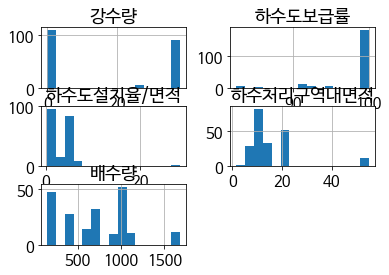

In [ ]:
#히스토그램
data[['강수량','하수도보급률', '하수도설치율/면적','하수처리구역내면적','배수량']].hist(bins=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78f81a1090>]],
      dtype=object)

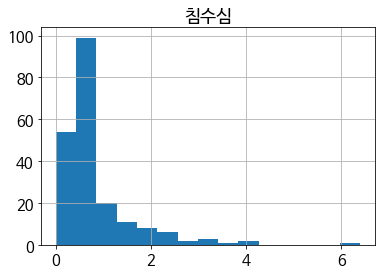

In [ ]:
#히스토그램
data[['침수심']].hist(bins=15)

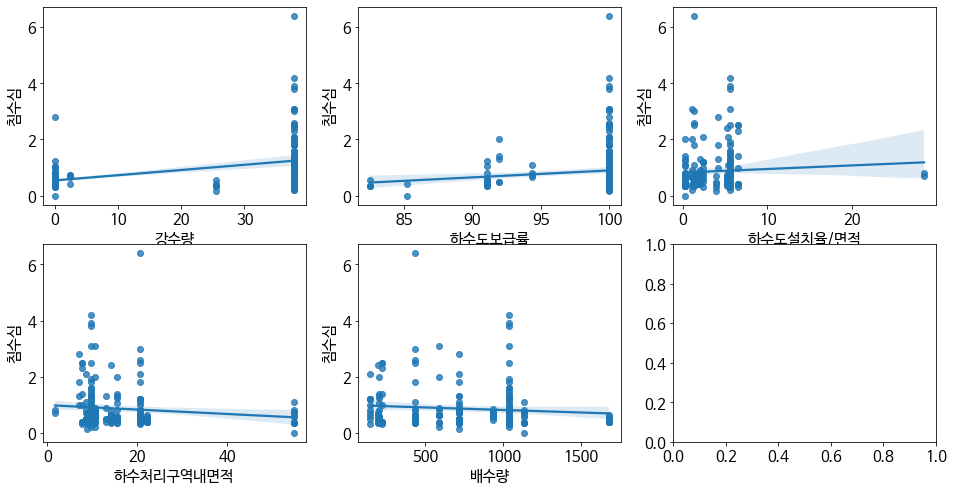

In [ ]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=3, nrows=2)

lm_features = ['강수량','하수도보급률', '하수도설치율/면적','하수처리구역내면적','배수량']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/3) # 2행
    col = i%3

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='침수심', data=data, ax=axs[row][col])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
        # m_s_e, r2(선형회귀모델 적합도 : 분산값, 1에 가까울수록 적합도 높음)

In [ ]:
# feature, target 데이터 분리
y_target = data['침수심'] # 레이블(종속변수)
X_data = data.drop(['침수심'], axis=1, inplace=False) # 피처(독립변수)

# train, test 데이터 분리
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

In [ ]:
# 표준 정규분포로 정규화 해주는 라이브러리 불러오기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# x_train 데이터 정규화
scaler.fit(X_train)

# x_train, x_test 데이터 정규화 및 변환
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 estimator(사이킷런이 제공) 알고리즘 학습
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression()
print(X_train.shape, X_test.shape)

(144, 5) (63, 5)


In [ ]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds[0:5]

array([1.4233675 , 0.75253229, 0.39548656, 1.22327225, 0.62232293])

In [ ]:
# 모델 정확도 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)

print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f} , MAE : {mae:.3f}')

MSE : 0.475, RMSE: 0.689 , MAE : 0.426


# * 변수 중요도(Varialbe Importance)란?
학습된 모형에 대하여 반응 변수와의 관련성 또는 예측 관점에서 각 변수들의 영향력을 수치화 한 것이다.

이는 모형의 예측력과 관련하여 개별 변수의 영향력을 측정하는 도구이다.

예측 모형 클래스에 관계 없이 적용가능한 Permutation Importance 방법으로 변수 중요도를 측정하여 시각화 해본다.

In [ ]:
# 생성된 모델의 변수중요도 계산
from sklearn.inspection import permutation_importance

features = ['강수량','하수도보급률', '하수도설치율/면적','하수처리구역내면적','배수량']

r = permutation_importance(lr, X_train, y_train,
                           n_repeats=30,
                           random_state=0)
for i, res in enumerate(zip(r.importances_mean, r.importances_std)):
    print(f'{features[i]}'+':', f'{res[0]:.3f}', '+/-', f'{res[1]:.3f}')

강수량: 0.466 +/- 0.083
하수도보급률: 0.013 +/- 0.009
하수도설치율/면적: 0.030 +/- 0.022
하수처리구역내면적: 0.001 +/- 0.003
배수량: 0.018 +/- 0.015


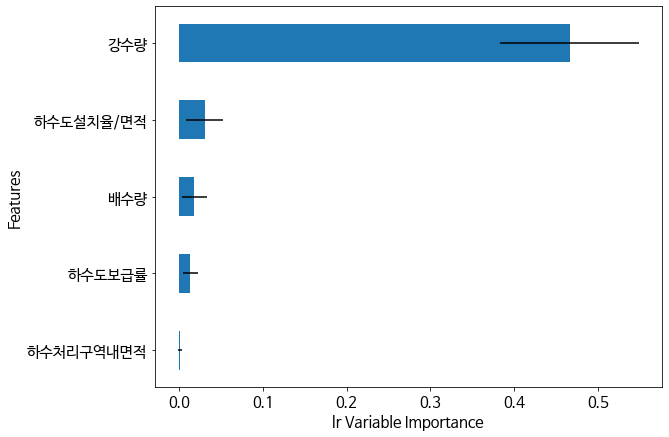

In [ ]:
# 생성된 모델의 변수 중요도 시각화 한 그래프 출력하기

def plot_importance(importance, importance_std, ax, x_label):
    temp1 = [f'{features[i]}' for i in range(len(importance))]
    temp2 = importance
    temp3 = importance_std
    result = sorted(zip(temp1, temp2, temp3), key=lambda x:x[1])
    label = [x[0] for x in result]
    value = [x[1] for x in result]
    value_2 = [x[2] for x in result]
    ax.barh(label, value, xerr=value_2, height=0.5)
    ax.set_xlabel(x_label)
    ax.set_ylabel('Features')

fig, axs = plt.subplots(1, 1)
fig.set_facecolor('white')
fig.set_figwidth(20)
fig.set_figheight(7)

ax1 = plt.subplot(1, 2, 1)

plot_importance(r.importances_mean, r.importances_std, ax1, 'lr Variable Importance')

plt.show()

In [ ]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,2))

절편 값: 0.9080625000000001
회귀계수: [ 0.4   0.06 -0.09  0.01 -0.08]


In [ ]:
# 회귀계수 정렬 (내림차순, 큰 값부터)
coeff = pd.Series(data=np.round(lr.coef_, 5), index=X_data.columns)
coeff.sort_values(ascending=False)

강수량          0.39718
하수도보급률       0.06340
하수처리구역내면적    0.01415
배수량         -0.08229
하수도설치율/면적   -0.08543
dtype: float64

# **N-FOLD(N = 5) 교차 검증**



In [ ]:
#cross_val_score() MSE --> RMSE 구하기
from sklearn.model_selection import cross_val_score

# features, target 데이터 정의
y_target = data['침수심']
X_data = data.drop(['침수심'], axis=1)

# 선형회귀 객체 생성
lr = LinearRegression()
lr
LinearRegression()

LinearRegression()

In [ ]:
# 5 folds 의 개별 Negative MSE scores (음수로 만들어 작은 오류 값이 더 큰 숫자로 인식됨)
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    # cv는 교차검증의 폴드 수
neg_mse_scores

array([-0.91823568, -0.99135939, -0.69185327, -0.05713903, -0.18965989])

In [ ]:
 # RMSE를 구하기 위해선 MSE 값에 -1을 곱한 후 평균을 내면 된다
rmse_scores =  np.sqrt(-1*neg_mse_scores)
rmse_scores

array([0.95824615, 0.99567032, 0.83177718, 0.23903772, 0.43549959])

In [ ]:
# 5 fold 의 평균 RMSE
avg_rmse = np.mean(rmse_scores)
avg_rmse

0.6920461914137288

In [ ]:
# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f' 5 folds 의 평균 RMSE : {avg_rmse:.3f}')

 5 folds 의 개별 Negative MSE scores:  [-0.92 -0.99 -0.69 -0.06 -0.19]
 5 folds 의 개별 RMSE scores :  [0.96 1.   0.83 0.24 0.44]
 5 folds 의 평균 RMSE : 0.692
